# HW - Decision Trees

### Please follow the instructions given during the class/demo

### Load sklearn's wine dataset and perform classification using Decision trees. Try different pruning techniques, criteria to split the tree which gives you best results. Plot the tree and comment on your findings. Also plot the feature importances of each tree.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.datasets import load_wine
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = features
data['target']=wine['target']
data['class']=data['target'].map(lambda ind: wine['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [5]:
data['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [6]:
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
def des_tree(crit,depth):
    clf = DecisionTreeClassifier(criterion=crit, max_depth=depth)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    feat_importances = pd.Series(clf.feature_importances_, index=wine.feature_names)
    feat_importances.nlargest(25).plot(kind='barh',figsize=(10,5))

    plt.figure(figsize=(12,8))
    plot_tree(clf);
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



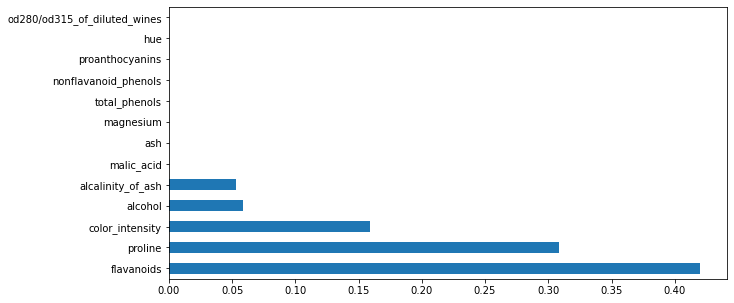

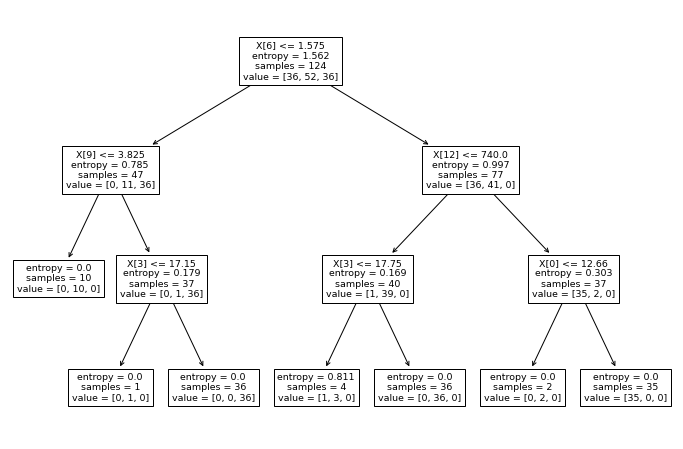

In [8]:
des_tree('entropy',3)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



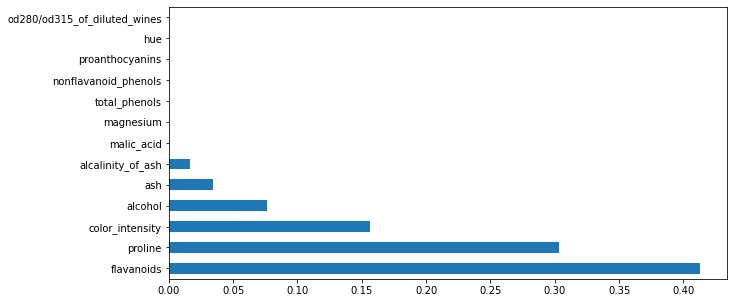

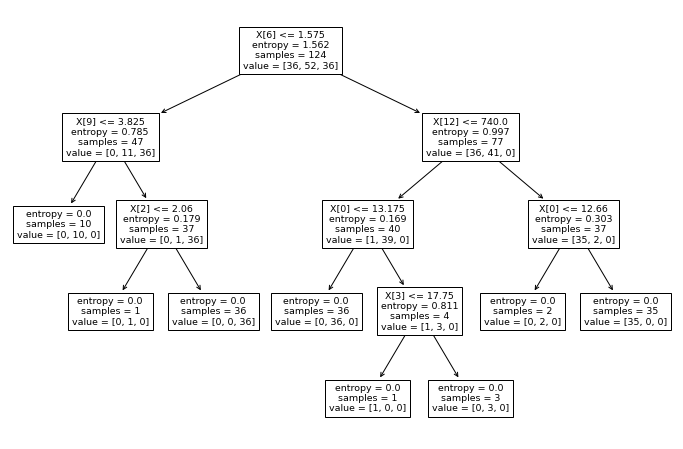

In [9]:
des_tree('entropy',50)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.90      0.95      0.92        19
           2       0.92      1.00      0.96        12

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



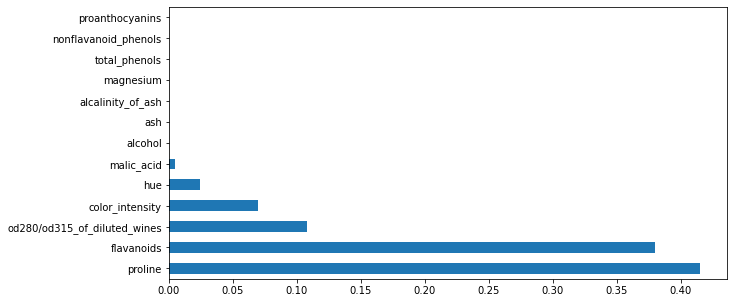

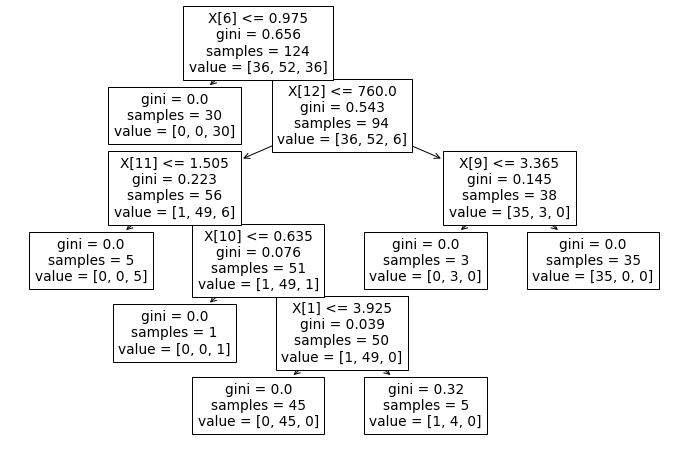

In [10]:
des_tree('gini',5)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.95      0.95      0.95        19
           2       0.85      0.92      0.88        12

    accuracy                           0.94        54
   macro avg       0.93      0.94      0.94        54
weighted avg       0.95      0.94      0.95        54



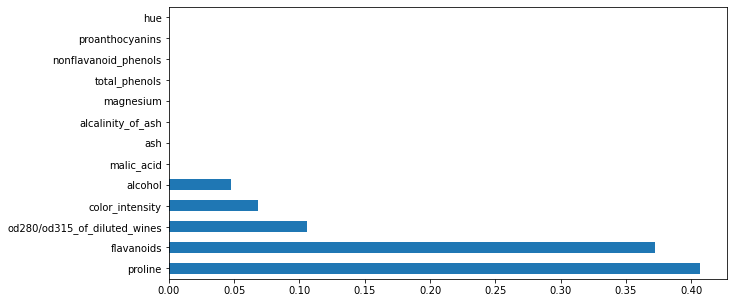

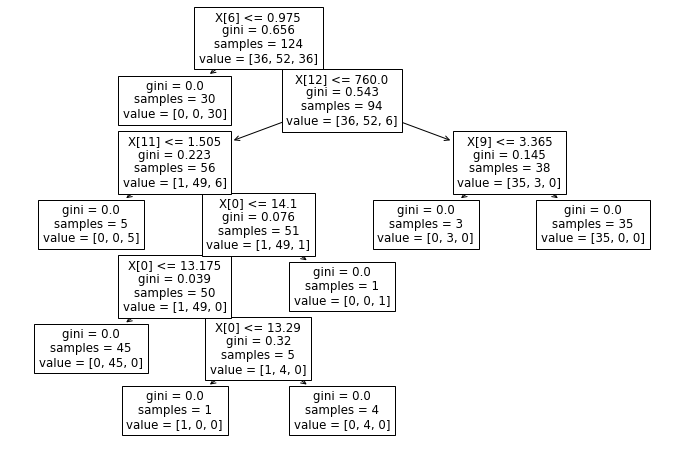

In [11]:
des_tree('gini',50)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.95      0.95      0.95        19
           2       0.92      1.00      0.96        12

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



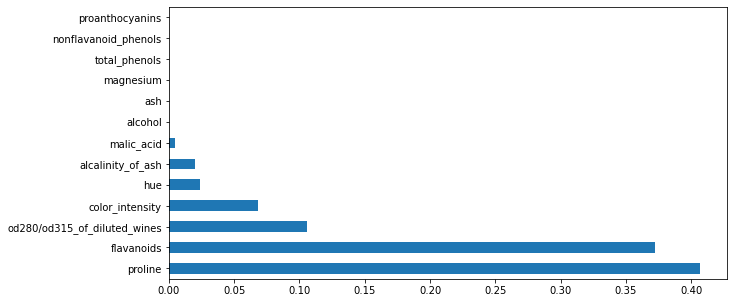

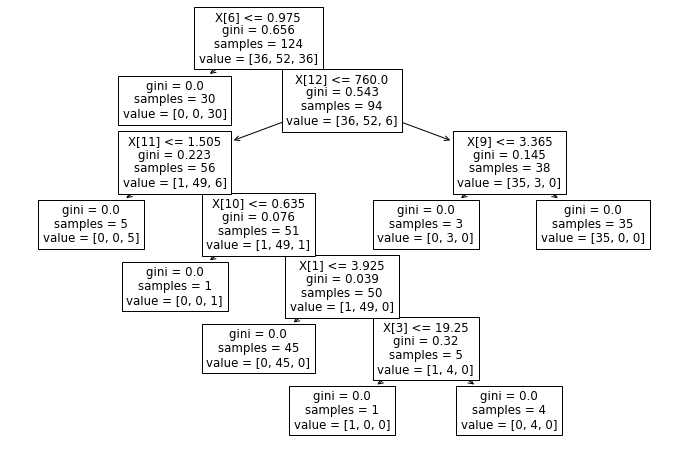

In [16]:
clf = DecisionTreeClassifier(max_leaf_nodes=50)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

feat_importances = pd.Series(clf.feature_importances_, index=wine.feature_names)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,5))

plt.figure(figsize=(12,8))
plot_tree(clf);
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.89      0.92        19
           2       0.92      1.00      0.96        12

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



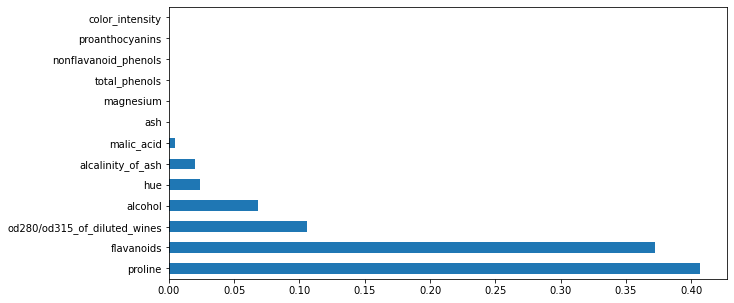

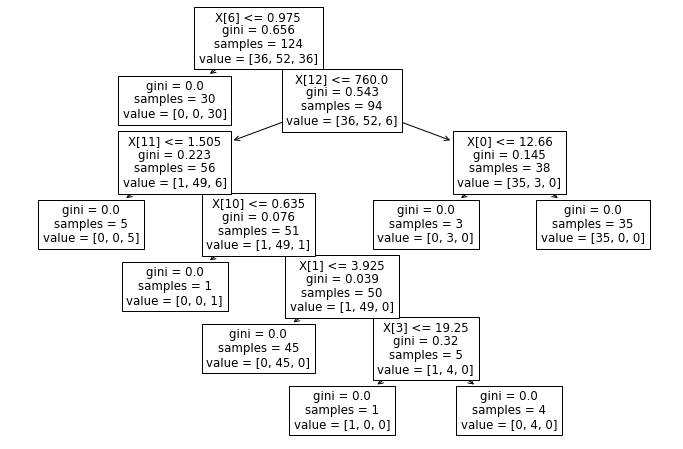

In [17]:
clf = DecisionTreeClassifier(max_leaf_nodes=500)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

feat_importances = pd.Series(clf.feature_importances_, index=wine.feature_names)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,5))
    
plt.figure(figsize=(12,8))
plot_tree(clf);
print(classification_report(y_test, y_pred))

Observation:
 - Used max_depth, criteria and max_leaf_nodes for pruning techniques.
 - Most of the tree gave 0.96 accuracy which was the highest.
 - Entropy impurity gave the best results compared to gini.

# HW - Random Forest



### Load sklearn's iris dataset and perform classification using Random Forest. Also plot the feature importances. Write down your comments.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
features = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
data = features
data['target']=iris['target']
data['class']=data['target'].map(lambda ind: iris['target_names'][ind])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
data['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [22]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
def rf_tree(feat,crit,depth,est):
    clf = RandomForestClassifier(max_features=feat,criterion=crit,max_depth=depth,n_estimators=est)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    feat_importances = pd.Series(clf.feature_importances_, index=iris.feature_names)
    feat_importances.nlargest(25).plot(kind='barh',figsize=(8,3))
    
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



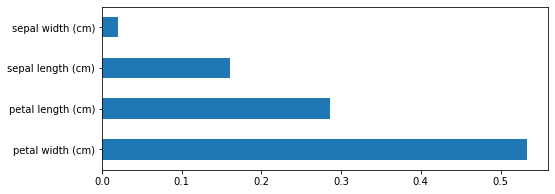

In [24]:
rf_tree('auto','gini',2,10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



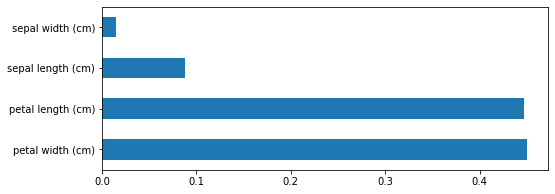

In [25]:
rf_tree('auto','gini',3,50)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



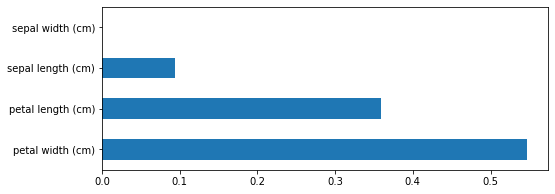

In [26]:
rf_tree('log2','entropy',3,10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



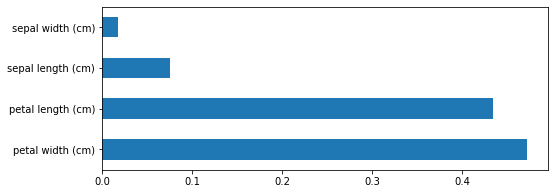

In [27]:
rf_tree('log2','entropy',4,70)

Observations:
 - Used max_features, n_estimators, max_depth and criterion as the pruning techniques.
 - Every model with different technique gave the same result of 0.96 accuracy.
 - But when using log2 max_feature, it only took three features into consideration and gave 0.96 accuracy.
 - Even with trying different techniques the accuracy remains same.
 - The maximum accuracy acheived is 0.96

## Write four differences between Random Forests and Decision Trees ¶


 - Decision trees are much easier to interpret, understand and visualize. Since a random forest combines multiple decision trees, it becomes more difficult to interpret.
 - Decision tree is fast and operates easily on large data sets. The random forest model needs rigorous training.
 - There is a possibility of overfitting in a decision tree. The use of multiple trees in the random forest reduces the risk of overfitting.
 - A random forest are powerful and gives more accurate results than a decision tree.